# Matplotlib Tutorial
##  (Part 1)
[Part 1](https://www.youtube.com/watch?v=UO98lJQ3QGI&list=PL-osiE80TeTvipOqomVEeZ1HRrcEvtZB_)

In [1]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
import numpy as np
import csv
from collections import Counter
from itertools import count
from matplotlib.animation import FuncAnimation

In [2]:
# data
ages_x = [25,26,27,28,29,30,31,32,33,34,35]
dev_y = [38496,42000,46752,49320,53200,56000,62316,64928,67317,68748,73752]
pyDev_y = [45372,48876,53850,57287,63016,65998,70003,70000,71496,75370,83640]
jsDev_y = [37810,43515,46823,49293,53437,56373,62375,66674,68745,68746,74583]


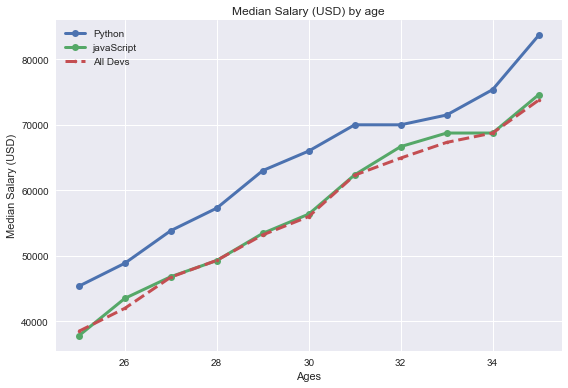

In [3]:
#style
plt.style.use('seaborn')
# plt.xkcd()

#adding to plot
plt.plot(ages_x, 
         pyDev_y, 
         label="Python",
        #  color="#5a7d9a",
         marker="o",
         linewidth= 3)

plt.plot(ages_x, 
         jsDev_y, 
         label="javaScript",
        #  color="#adad3b",
         marker="o",
         linewidth= 3)

plt.plot(ages_x, 
         dev_y, 
         label= "All Devs",
        #  color="#444444",
         linestyle="--",
         marker=".",
         linewidth= 3)

# adding title
plt.title("Median Salary (USD) by age")
plt.xlabel("Ages")
plt.ylabel("Median Salary (USD)")

# adding legend
plt.legend() # order that they were added to the plots

plt.tight_layout()

# plt.grid(True)

plt.show()

## (Part 2): Bar Charts and Analyzing from CSVs
Adding multiple barcharts to a single plot

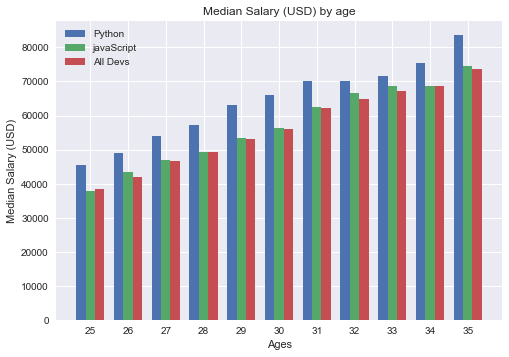

In [4]:
plt.style.use("seaborn")

# shifting the x-axis values to allow us to plot multiple bar charts on a single plot
x_indexes = np.arange(len(ages_x))
width= 0.25 # widths for bar chart shifting

plt.bar(x_indexes - width, 
         pyDev_y, 
         label="Python",
         width= width)

plt.bar(x_indexes, 
         jsDev_y, 
         label="javaScript",
         width= width)

plt.bar(x_indexes + width, 
         dev_y, 
         label= "All Devs",
         width= width)

plt.legend()

# adding title
plt.title("Median Salary (USD) by age")
plt.xlabel("Ages")
plt.ylabel("Median Salary (USD)")

plt.xticks(ticks= x_indexes, labels= ages_x)

plt.show()

### Horizontal Bar Charts
Horizontal bar charts are used when we have a lot of observed values

In [5]:
# Using Counter library to count occurrences from csv data
c = Counter(['Python', 'JavaScript']) #creates a Coynter class
print(c)
c.update(['Python', 'C++']) # appends to our class
print(c)
c.update(['Python', 'C++', 'JavaScript'])
print(c)

Counter({'Python': 1, 'JavaScript': 1})
Counter({'Python': 2, 'JavaScript': 1, 'C++': 1})
Counter({'Python': 3, 'JavaScript': 2, 'C++': 2})


In [6]:
# plt.style.available
plt.style.use('seaborn-deep')
with open('./data/data.csv') as csv_file:
    csv_reader = csv.DictReader(csv_file) # csv import converts data to dict
    
    print(csv_reader.fieldnames) # shows the keys in the dictcreated
    
    language_counter = Counter()

    row = next(csv_reader) # Creates iterator
    print(row['LanguagesWorkedWith']) # values for the first key/value pair

    for row in csv_reader: # for every row in the data file
        language_counter.update(row['LanguagesWorkedWith'].split(';')) # updates Counter for every row of data

print(language_counter)
print(f'Top 15: {language_counter.most_common(15)}')
    


['Responder_id', 'LanguagesWorkedWith']
HTML/CSS;Java;JavaScript;Python
Counter({'JavaScript': 59218, 'HTML/CSS': 55465, 'SQL': 47544, 'Python': 36442, 'Java': 35916, 'Bash/Shell/PowerShell': 31991, 'C#': 27097, 'PHP': 23030, 'C++': 20524, 'TypeScript': 18523, 'C': 18017, 'Other(s):': 7920, 'Ruby': 7331, 'Go': 7201, 'Assembly': 5833, 'Swift': 5744, 'Kotlin': 5620, 'R': 5048, 'VBA': 4781, 'Objective-C': 4191, 'Scala': 3309, 'Rust': 2794, 'Dart': 1683, 'Elixir': 1260, 'Clojure': 1254, 'WebAssembly': 1015, 'F#': 973, 'Erlang': 777})
Top 15: [('JavaScript', 59218), ('HTML/CSS', 55465), ('SQL', 47544), ('Python', 36442), ('Java', 35916), ('Bash/Shell/PowerShell', 31991), ('C#', 27097), ('PHP', 23030), ('C++', 20524), ('TypeScript', 18523), ('C', 18017), ('Other(s):', 7920), ('Ruby', 7331), ('Go', 7201), ('Assembly', 5833)]


Languages: ['JavaScript', 'HTML/CSS', 'SQL', 'Python', 'Java', 'Bash/Shell/PowerShell', 'C#', 'PHP', 'C++', 'TypeScript', 'C', 'Other(s):', 'Ruby', 'Go', 'Assembly']
 Popularity: [59218, 55465, 47544, 36442, 35916, 31991, 27097, 23030, 20524, 18523, 18017, 7920, 7331, 7201, 5833]


Text(0, 0.5, 'Number of users')

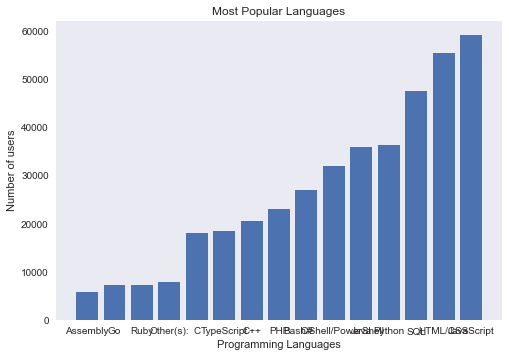

In [7]:
# need to split top 15 languages into two lists: languages and count/popularity
languages, popularity = [], []
for item in language_counter.most_common(15):
    languages.append(item[0])
    popularity.append(item[1])

print(f'Languages: {languages}\n Popularity: {popularity}')

languages.reverse() #reverse the list in place for display ascending popularity
popularity.reverse()

plt.grid()
plt.bar(languages, popularity)

plt.title("Most Popular Languages")
plt.xlabel("Programming Languages")
plt.ylabel("Number of users")

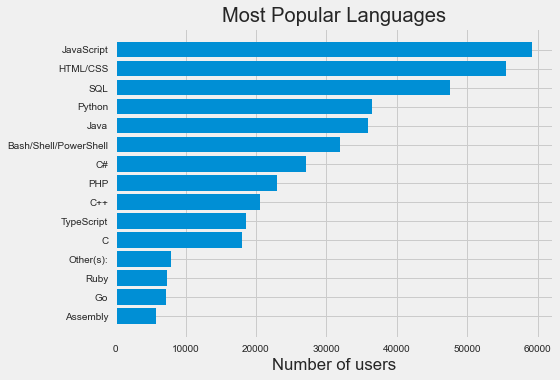

In [8]:
plt.style.use('fivethirtyeight')
plt.barh(languages, popularity)

plt.title("Most Popular Languages")
# plt.ylabel("Programming Languages")
plt.xlabel("Number of users")
plt.tight_layout()
plt.show()

Counter({'JavaScript': 59219, 'HTML/CSS': 55466, 'SQL': 47544, 'Python': 36443, 'Java': 35917, 'Bash/Shell/PowerShell': 31991, 'C#': 27097, 'PHP': 23030, 'C++': 20524, 'TypeScript': 18523, 'C': 18017, 'Other(s):': 7920, 'Ruby': 7331, 'Go': 7201, 'Assembly': 5833, 'Swift': 5744, 'Kotlin': 5620, 'R': 5048, 'VBA': 4781, 'Objective-C': 4191, 'Scala': 3309, 'Rust': 2794, 'Dart': 1683, 'Elixir': 1260, 'Clojure': 1254, 'WebAssembly': 1015, 'F#': 973, 'Erlang': 777})


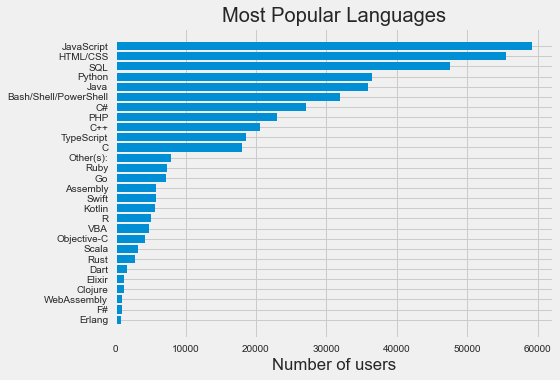

In [9]:
# same as above but with pandas
data = pd.read_csv('./data/data.csv')
ids = data['Responder_id']
lang_responses = data['LanguagesWorkedWith']

language_counter = Counter()

for response in lang_responses:
    language_counter.update(response.split(';'))

print(language_counter)

languages, popularity = [], []
for items in language_counter.most_common():
    languages.append(items[0])
    popularity.append(items[1])

languages.reverse()
popularity.reverse()

plt.barh(languages, popularity)
plt.title("Most Popular Languages")
# plt.ylabel("Programming Languages")
plt.xlabel("Number of users")
plt.tight_layout()
plt.show()

# (Part 3): Pie Charts
[VidLink](https://www.youtube.com/watch?v=MPiz50TsyF0&list=PL-osiE80TeTvipOqomVEeZ1HRrcEvtZB_&index=3)
Anything larger than 5 categories/slices will make the visual look crowded

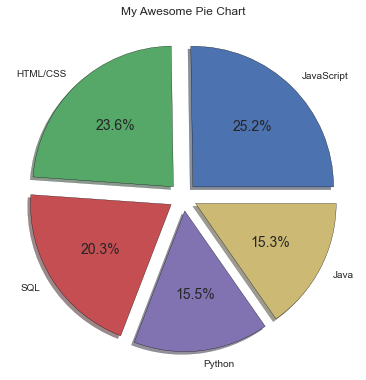

In [10]:
plt.style.use('seaborn')

slices = [59219, 55466, 47544, 36443, 35917]
labels = ['JavaScript', 'HTML/CSS', 'SQL', 'Python', 'Java']
explode = [0.1, 0.1, 0.1, 0.1, 0.1] # moves the slice out by x of the radius

plt.pie(slices, 
        labels=labels, 
        # colors=colors, 
        wedgeprops={'edgecolor': 'black'}, #wedge properties: 
        explode= explode, #pops the slice out
        autopct="%.1f%%",
        shadow= True)

plt.title("My Awesome Pie Chart")
plt.tight_layout()
plt.show()

# (Part 4): Stack Plots
[VidLink](https://www.youtube.com/watch?v=xN-Supd4H38&list=PL-osiE80TeTvipOqomVEeZ1HRrcEvtZB_&index=4)

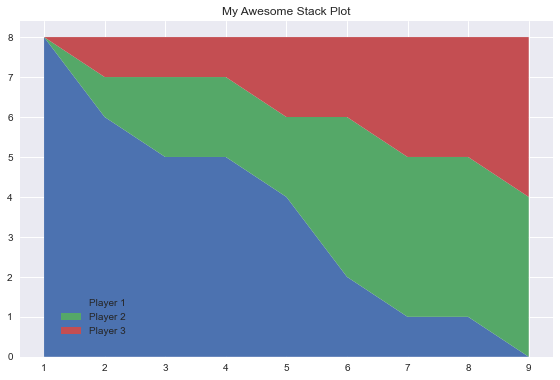

In [11]:
player1 = [8, 6, 5, 5, 4, 2, 1, 1, 0]
player2 = [0, 1, 2, 2, 2, 4, 4, 4, 4]
player3 = [0, 1, 1, 1, 2, 2, 3, 3, 4]
minutes = [1,2,3,4,5,6,7,8,9]
labels = ['Player 1', 'Player 2', 'Player 3']

plt.stackplot(minutes, player1, player2, player3, labels=labels)
plt.title("My Awesome Stack Plot")
plt.tight_layout()
plt.legend(loc=(0.07, 0.05)) # 7% from left, 5% from bottom
plt.show()

# (Part 5): Filling Area on Line Plots
[VidLink](https://www.youtube.com/watch?v=x0Uguu7gqgk&list=PL-osiE80TeTvipOqomVEeZ1HRrcEvtZB_&index=5) Interesting use of fill_between() and y2 values and how it flips data fills in the graphs.

In [12]:
data = pd.read_csv('./data/devs_data.csv')
ages = data['Age']
dev_salaries = data['All_Devs']
py_salaries = data['Python']
js_salaries = data['JavaScript']

Text(0, 0.5, 'Median Salary (USD)')

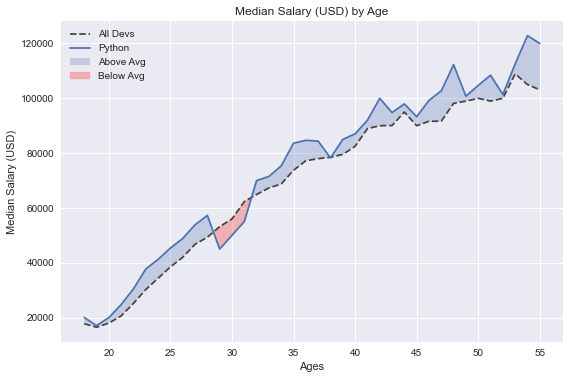

In [13]:
plt.plot(ages, 
         dev_salaries, 
         color='#444444',
         linestyle='--',
         label='All Devs')

plt.plot(ages, py_salaries, label='Python')

overall_median = 57287

# filling lines
plt.fill_between(ages, #x values
                 py_salaries, #y values
                 y2=dev_salaries, # flip point
                 where=(py_salaries > dev_salaries), # start of fill condition
                 interpolate=True,
                 label='Above Avg',
                 alpha=0.25)

plt.fill_between(ages, #x values
                 py_salaries, #y values
                 y2=dev_salaries, # flip point
                 where=(py_salaries <= dev_salaries), # start of fill condition
                 interpolate=True,
                 color='red',
                 label='Below Avg',
                 alpha=0.25)

plt.legend()
plt.title('Median Salary (USD) by Age')
plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')

## (Part 6): Histograms

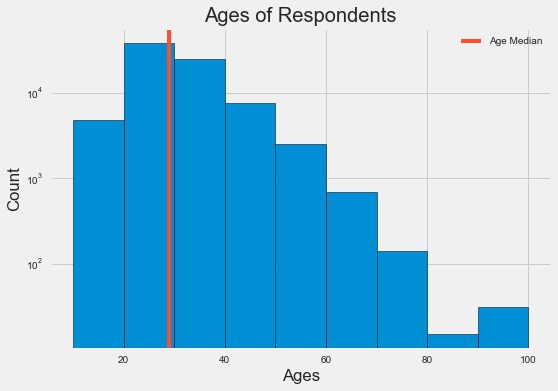

In [14]:
plt.style.use('fivethirtyeight')
ages=None

# ages = [18,19,21,25,26,26,30,32,38,45,55]
bins= [10, 20, 30, 40, 50, 60,70,80,90,100]

data = pd.read_csv('./data/ageGroup_data.csv')
ids = data['Responder_id']
ages = data['Age']
median_age = 29
color = '#fc4f30'

plt.axvline(median_age, color=color, label='Age Median')

plt.hist(ages, 
         bins= bins, 
         edgecolor='black', 
         log= True)

plt.title('Ages of Respondents')
plt.ylabel('Count')
plt.xlabel('Ages')
plt.legend()

## (Part 7): Scatter Plots
[VidLink](https://www.youtube.com/watch?v=zZZ_RCwp49g&list=PL-osiE80TeTvipOqomVEeZ1HRrcEvtZB_&index=7)<br>

View marker styles [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)<br>
View color maps [here](https://matplotlib.org/stable/tutorials/colors/colormaps.html)<br>
Can change the sizes of individual points with the 's' attribute.<br>
And add a color bar with the 'plt.colorbar()' method

C:\Users\brend\AppData\Local\Temp/ipykernel_17832/1827552944.py:21: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()


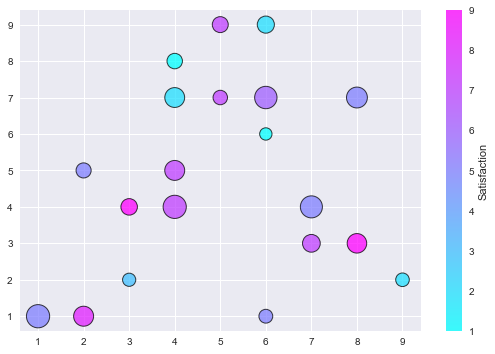

In [15]:
plt.style.use('seaborn')

x = [5,7,8,5,6,7,9,2,3,4,4,4,2,6,3,6,8,6,4,1]
y = [7,4,3,9,1,3,2,5,2,4,8,7,1,6,4,9,7,7,5,1]

colors = [7,5,9,7,5,7,2,5,3,7,1,2,8,1,9,2,5,6,7,5]
sizes = [209,486,381,255,191,315,185,228,174,538,239,394,399,153,273,293,436,501,397,539]

# Scatter plot creation
plt.scatter(x, 
            y,
            s= sizes, #marker size
            c= colors, #marker color
            cmap='cool',
            # marker='X', #marker style
            edgecolor='black',
            linewidth=1,
            alpha= 0.75
            )

cbar = plt.colorbar()
cbar.set_label('Satisfaction')

plt.show()




C:\Users\brend\AppData\Local\Temp/ipykernel_17832/1137253463.py:21: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(cmap='cool')


Text(0, 0.5, 'Total Likes')

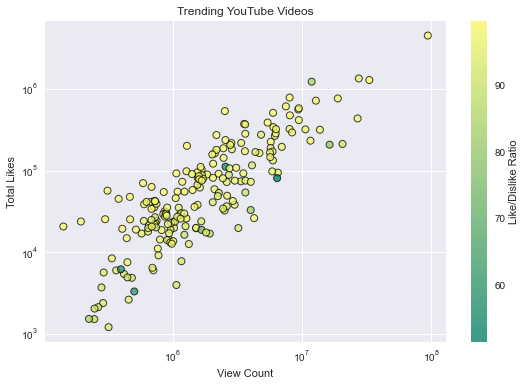

In [16]:


data = pd.read_csv('./data/2019-05-31-data.csv')
view_count = data['view_count']
likes = data['likes']
ratio = data['ratio'] #likes to dislikes ratio

plt.scatter(view_count, 
            likes,
            # s= sizes, #marker size
            c= ratio, #marker color
            cmap='summer',
            # marker='X', #marker style
            edgecolor='black',
            linewidth=1,
            alpha= 0.75
            )

# Scalling our axis
plt.xscale('log')
plt.yscale('log')

cbar = plt.colorbar(cmap='cool')
cbar.set_label('Like/Dislike Ratio')

plt.title('Trending YouTube Videos')
plt.xlabel('View Count')
plt.ylabel('Total Likes')

## (Part 8): Plotting Time Series Data
[VidLink](https://www.youtube.com/watch?v=_LWjaAiKaf8&list=PL-osiE80TeTvipOqomVEeZ1HRrcEvtZB_&index=8)<br>
Uses matplotlib dates library as mpl_dates

C:\Users\brend\AppData\Local\Temp/ipykernel_17832/2976575166.py:14: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(dates,


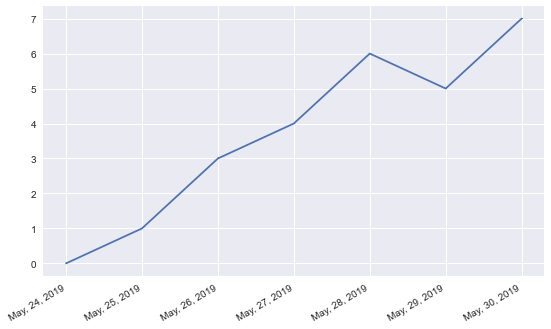

In [17]:
# lists as python datetime objects
dates = [
    datetime(2019, 5, 24),
    datetime(2019, 5, 25),
    datetime(2019, 5, 26),
    datetime(2019, 5, 27),
    datetime(2019, 5, 28),
    datetime(2019, 5, 29),
    datetime(2019, 5, 30)
]

y = [0, 1, 3, 4, 6, 5, 7]

plt.plot_date(dates,
              y,
              linestyle='solid', #joins the points
              marker=',')# makes the markers pixels)

plt.gcf().autofmt_xdate() #auto formats dates in xaxis

date_format = mpl_dates.DateFormatter('%b, %d, %Y') # formats the date

plt.gca().xaxis.set_major_formatter(date_format) # get current axis and set it as predefined one

plt.show()

C:\Users\brend\AppData\Local\Temp/ipykernel_17832/2061807159.py:8: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(price_date,


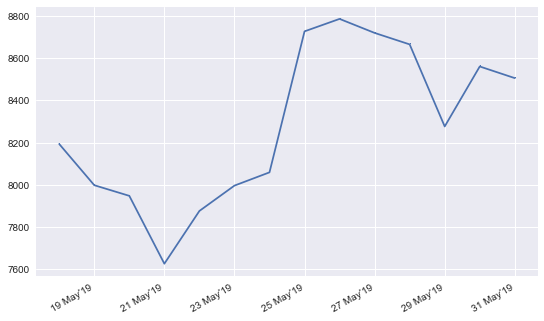

In [18]:
dateTime_parser = lambda x: datetime.strptime(x, '%Y-%m-%d')
data = pd.read_csv('./data/btc_data.csv', 
                   date_parser=dateTime_parser, 
                   parse_dates= ['Date'])
price_date = data['Date']
price_close = data['Close']

plt.plot_date(price_date, 
              price_close,
              linestyle='solid',
              marker=',')

plt.gcf().autofmt_xdate() #auto formats dates in xaxis

date_format = mpl_dates.DateFormatter("%d %b'%y") # formats the date

plt.gca().xaxis.set_major_formatter(date_format) # get current axis and set it as predefined one

## (Part 10): Subplots
Creating plots via an object oriented model. In this model we use a figure object and corresponding axis objects. The figure object contains drawing board where the plots are drawn, the axis are the actual plots. to set titles we use ax.set_title() instead of the plt.title() method.<br>

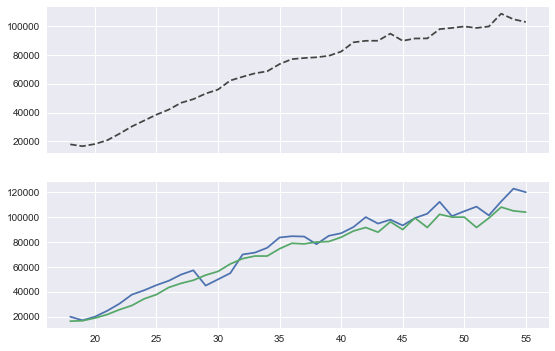

In [26]:
data = pd.read_csv('./data/devs_data.csv')
ages = data['Age']
dev_salaries = data['All_Devs']
py_salaries = data['Python']
js_salaries = data['JavaScript']

fig, (ax1, ax2) = plt.subplots(nrows=2, # rows of subplots
                               ncols=1, # columns of subplots
                               sharex= True, # shares the x-axis of the  with the two axis created
                               ) 

ax1.plot(ages, 
         dev_salaries, 
         color='#444444',
         linestyle='--',
         label='All Devs')

ax2.plot(ages, py_salaries, label='Python')
ax2.plot(ages, js_salaries, label='JavaScript')

overall_median = 57287


ax.legend()
ax.set_title('Median Salary (USD) by Age')
ax.set_xlabel('Ages')
ax.set_ylabel('Median Salary (USD)')

plt.show()